<a href="https://colab.research.google.com/github/denam98/UOM_ML_Project_01/blob/main/uomMLproject_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"

--2023-03-31 06:24:09--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4549 (4.4K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.44K  --.-KB/s    in 0s      

2023-03-31 06:24:10 (43.5 MB/s) - ‘iris.csv’ saved [4549/4549]



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
import pickle # To save the model
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

In [4]:
col_name = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data_set = pd.read_csv('iris.csv', names = col_name)
# data_set.shape
# data_set.head(5)
data_set.sample(5)

,sepal-length,sepal-width,petal-length,petal-width,class
115,6.4,3.2,5.3,2.3,Iris-virginica
68,6.2,2.2,4.5,1.5,Iris-versicolor
118,7.7,2.6,6.9,2.3,Iris-virginica
136,6.3,3.4,5.6,2.4,Iris-virginica
63,6.1,2.9,4.7,1.4,Iris-versicolor


In [5]:
data_set.describe()
# data_set.info()
# dataFrame = pd.DataFrame(data=data_set)
# dataFrame.max('petal-length')

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data_set['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

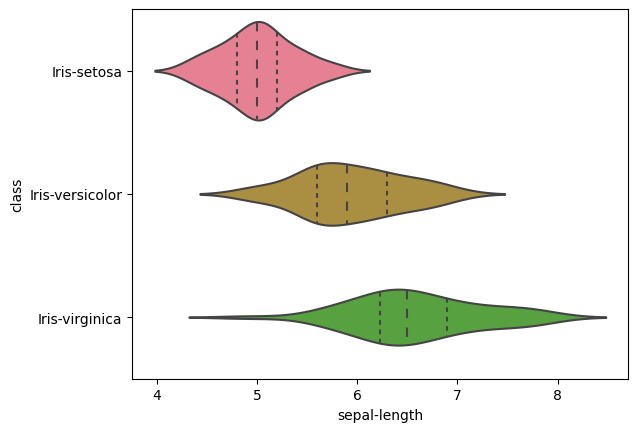

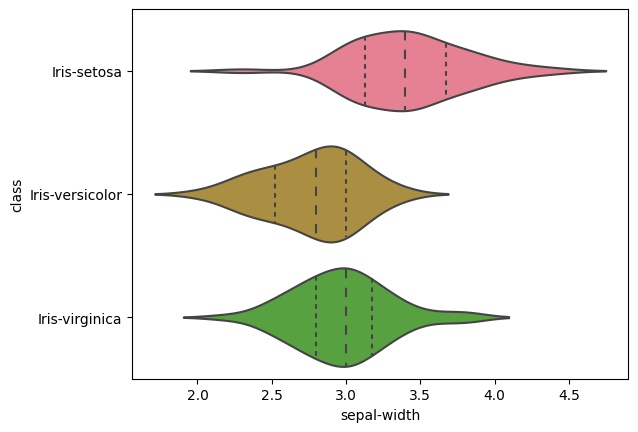

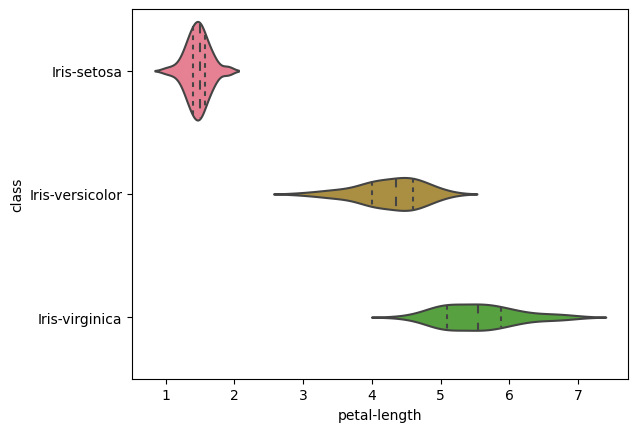

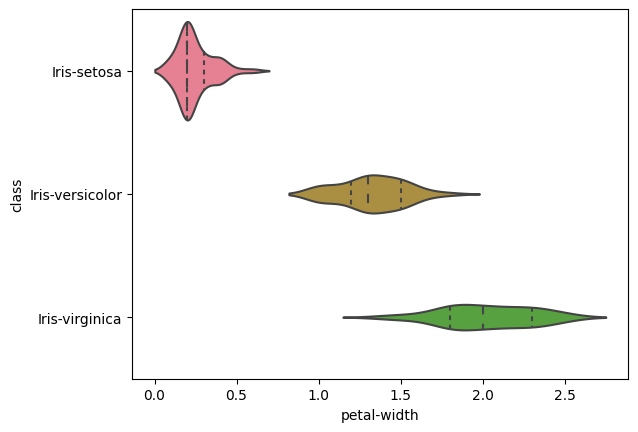

In [7]:
sns.violinplot(y='class', x='sepal-length', data=data_set, inner='quartile')
plt.show()
sns.violinplot(y='class', x='sepal-width', data=data_set, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal-length', data=data_set, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal-width', data=data_set, inner='quartile')
plt.show()

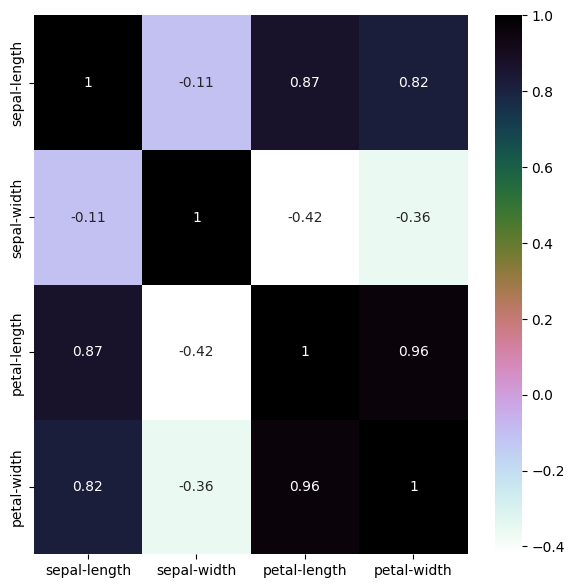

In [8]:
plt.figure(figsize=(7,7))
sns.heatmap(data_set.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [9]:
X = data_set.drop(['class'], axis=1)
y = data_set['class']
print(f'X shape: {X.shape} | y shape: {y.shape}')

X shape: (150, 4) | y shape: (150,)


In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
x_train.shape

(120, 4)

In [11]:
svn = SVC()
svn.fit(x_train, y_train)

SVC()

In [12]:
predictions = svn.predict(x_test)

accuracy_score(y_test, predictions)

0.9666666666666667

In [13]:
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



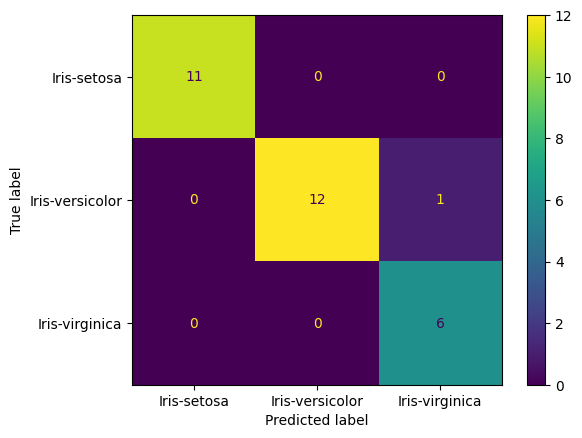

In [14]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.show()

In [15]:
with open('SVM.pickle', 'wb') as f:
  pickle.dump(svn, f)

In [16]:
with open('SVM.pickle', 'rb') as f:
  model = pickle.load(f)

model.predict(x_test)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)